 Interprétation et Visualisation

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("cve_enrichies.csv", sep=";")
df.head(10)

,ID_ANSSI,Titre_ANSSI,Type,Date,CVE,CVSS,Base_Severity,CWE,EPSS,Lien,Description,Éditeur,Produit,Versions_Affectées
0,CERTFR-2025-AVI-1076,Multiples vulnérabilités dans MISP (08 décembr...,avis,"Mon, 08 Dec 2025 00:00:00 +0000",CVE-2025-67906,5.4,Moyenne,CWE-79,0.00035,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,"In MISP before 2.5.28, app/View/Elements/Workf...",MISP,MISP,0
1,CERTFR-2025-AVI-1097,Vulnérabilité dans les produits Mitel (11 déce...,avis,"Thu, 11 Dec 2025 00:00:00 +0000",CVE-2025-67823,NaN,NaN,NaN,NaN,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Non disponible,NaN,NaN,NaN
2,CERTFR-2025-AVI-1111,Multiples vulnérabilités dans Roundcube (15 dé...,avis,"Mon, 15 Dec 2025 00:00:00 +0000",CVE-2025-68461,7.2,Élevée,CWE-79,0.00042,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Roundcube Webmail before 1.5.12 and 1.6 before...,Roundcube,Webmail,"0, 1.6.0"
3,CERTFR-2025-AVI-1111,Multiples vulnérabilités dans Roundcube (15 dé...,avis,"Mon, 15 Dec 2025 00:00:00 +0000",CVE-2025-68460,7.2,Élevée,CWE-116,0.00048,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Roundcube Webmail before 1.5.12 and 1.6 before...,Roundcube,Webmail,"0, 1.6.0"
4,CERTFR-2025-AVI-1129,Multiples vulnérabilités dans les produits VMw...,avis,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2025-4673,6.8,Moyenne,Non disponible,0.00012,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Proxy-Authorization and Proxy-Authenticate hea...,Go standard library,net/http,"0, 1.24.0-0"
5,CERTFR-2025-AVI-1129,Multiples vulnérabilités dans les produits VMw...,avis,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2025-22869,7.5,Élevée,CWE-770,0.00215,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,SSH servers which implement file transfer prot...,golang.org/x/crypto,golang.org/x/crypto/ssh,0
6,CERTFR-2025-AVI-1129,Multiples vulnérabilités dans les produits VMw...,avis,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2025-8291,4.3,Moyenne,CWE-1285,0.00127,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,The 'zipfile' module would not check the valid...,Python Software Foundation,CPython,"3.13.0, 3.10.0, 0, 3.11.0, 3.12.0, 3.14.0"
7,CERTFR-2025-AVI-1129,Multiples vulnérabilités dans les produits VMw...,avis,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2022-29526,NaN,NaN,Non disponible,0.00182,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,Go before 1.17.10 and 1.18.x before 1.18.2 has...,NaN,NaN,NaN
8,CERTFR-2025-AVI-1129,Multiples vulnérabilités dans les produits VMw...,avis,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2020-7792,7.5,Élevée,Non disponible,0.00982,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,This affects all versions of package mout. The...,NaN,mout,0
9,CERTFR-2025-AVI-1129,Multiples vulnérabilités dans les produits VMw...,avis,"Fri, 19 Dec 2025 00:00:00 +0000",CVE-2025-12816,8.6,Élevée,CWE-436,0.00057,https://www.cert.ssi.gouv.fr/avis/CERTFR-2025-...,An interpretation-conflict (CWE-436) vulnerabi...,Digital Bazaar,"forge, node-forge",0


Histogramme des scores CVSS : pour observer la distribution des vulnérabilités
selon leur niveau de gravité (critique, élevée, moyenne)

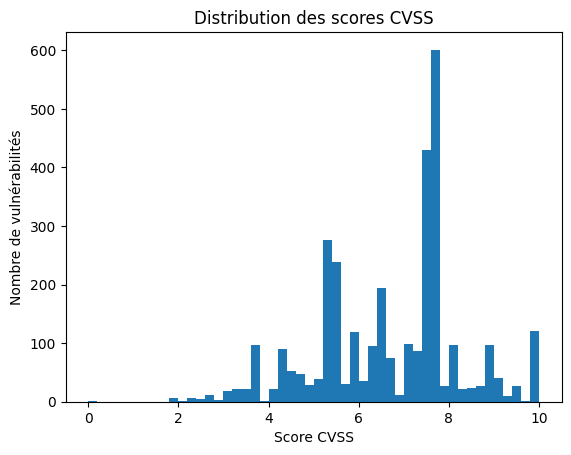

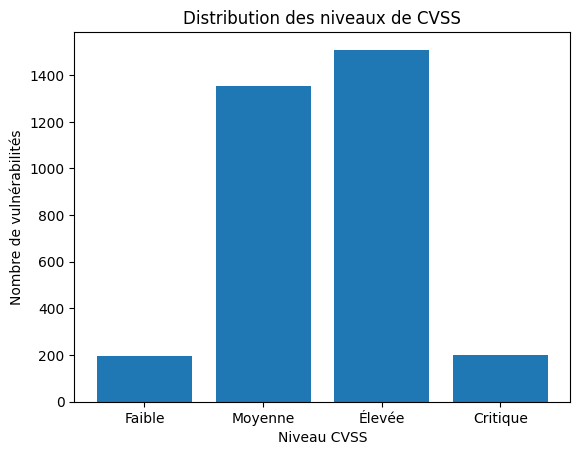

In [4]:
plt.figure()
plt.hist(df["CVSS"].dropna(), bins=50)
plt.title("Distribution des scores CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()
print("\n")

ordre = ["Faible", "Moyenne", "Élevée", "Critique"]
counts = df["Base_Severity"].value_counts()
counts = counts.reindex(ordre)
plt.figure()
plt.bar(counts.index, counts.values)
plt.title("Distribution des niveaux de CVSS")
plt.xlabel("Niveau CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()


*  Les scores sont surtout concentrés dans une zone moyenne-haute (≈ 5 à 8).
*   La majorité des vulnérabilités est Moyenne et Élevée.
*  Les "Critiques" sont rares → l’alerte “urgence” doit viser un petit sous-ensemble, sinon on sur-alerte.



Distribution des avis et des alertes

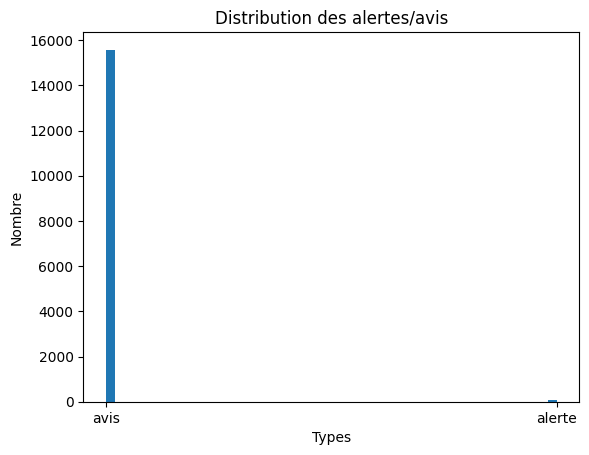

In [16]:
plt.figure()
plt.hist(df["Type"].dropna(), bins=50)
plt.title("Distribution des alertes/avis")
plt.xlabel("Types")
plt.ylabel("Nombre")
plt.show()
print("\n")



*   Les avis sont très majoritaires comparés aux alertes



Histogramme des scores EPSS pour les alertes

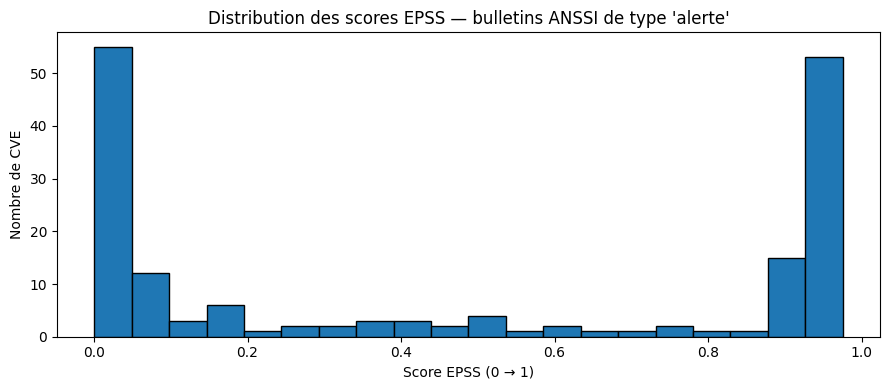

In [7]:
df_alertes = df[df["Type"].astype(str).str.lower().eq("alerte")].copy()

df_alertes["EPSS"] = pd.to_numeric(df_alertes["EPSS"], errors="coerce")
df_alertes = df_alertes.dropna(subset=["EPSS"])

plt.figure(figsize=(9, 4))
plt.hist(df_alertes["EPSS"], bins=20, edgecolor="black")
plt.title("Distribution des scores EPSS — bulletins ANSSI de type 'alerte'")
plt.xlabel("Score EPSS")
plt.ylabel("Nombre de CVE")
plt.tight_layout()
plt.show()




*   La grande majorité des CVE ont un score EPSS entre 0 et 0.1 et entre 0.9 et 1




Histogramme des scores EPSS pour les avis

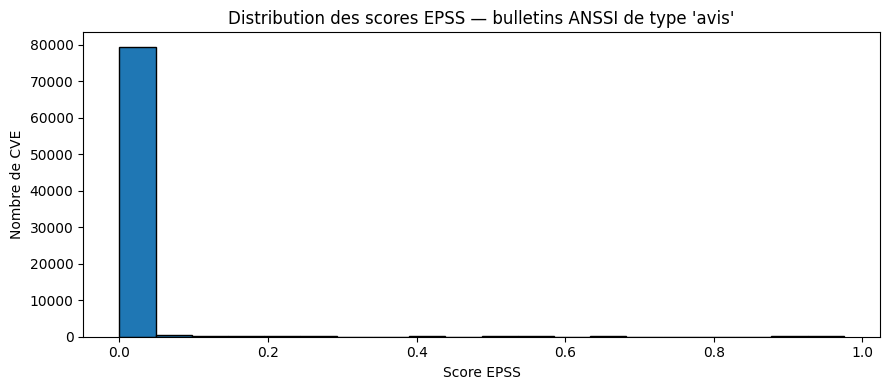

In [8]:
df_alertes = df[df["Type"].astype(str).str.lower().eq("avis")].copy()

df_alertes["EPSS"] = pd.to_numeric(df_alertes["EPSS"], errors="coerce")
df_alertes = df_alertes.dropna(subset=["EPSS"])

plt.figure(figsize=(9, 4))
plt.hist(df_alertes["EPSS"], bins=20, edgecolor="black")
plt.title("Distribution des scores EPSS — bulletins ANSSI de type 'avis'")
plt.xlabel("Score EPSS")
plt.ylabel("Nombre de CVE")
plt.tight_layout()
plt.show()




*   Les avis ne concernent que les scores EPSS compris entre 0 et 0.1
*   Donc les alertes représente une plus grande dangerosité



Répartition des CWE les plus fréquents - Top 10

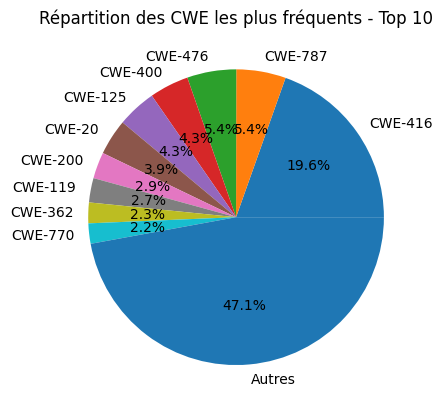

In [5]:
counts = df["CWE"].value_counts().drop("Non disponible", errors="ignore") #on ignore les CWE non dispo

top_n = 10
top = counts.head(top_n) #valeurs trié par défaut par ordre décroissant
autres = counts.iloc[top_n:].sum()

if autres > 0:
    top["Autres"] = autres

plt.figure()
plt.pie(top.values, labels=top.index, autopct="%.1f%%")
plt.title("Répartition des CWE les plus fréquents - Top 10")
plt.show()



*  Le “Top 10” ne couvre pas tout : “Autres” ≈ 34% → les failles sont très diversifiées




Diagramme circulaire des types de vulnérabilités (CWE) : pour identifier les
catégories de faiblesses les plus fréquentes

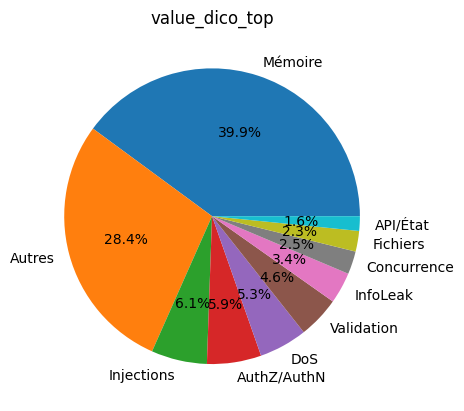

In [9]:
counts = df["CWE"].value_counts().drop("Non disponible", errors="ignore") # Recalculate counts

cwe_vers_probleme = {
    # Fichiers / chemins / permissions fichier
    "CWE-22": "Fichiers",
    "CWE-61": "Fichiers",
    "CWE-378": "Fichiers",
    "CWE-59": "Fichiers",

    # Mémoire (corruption, overflow, UAF, fuites)
    "CWE-121": "Mémoire",
    "CWE-122": "Mémoire",
    "CWE-125": "Mémoire",
    "CWE-170": "Mémoire",
    "CWE-190": "Mémoire",
    "CWE-401": "Mémoire",
    "CWE-404": "Mémoire",
    "CWE-409": "Mémoire",
    "CWE-416": "Mémoire",
    "CWE-476": "Mémoire",
    "CWE-787": "Mémoire",
    "CWE-789": "Mémoire",
    "CWE-825": "Mémoire",

    # DoS / crash / robustesse
    "CWE-400": "DoS",
    "CWE-407": "DoS",
    "CWE-674": "DoS",
    "CWE-755": "DoS",
    "CWE-835": "DoS",
    "CWE-909": "DoS",

    # Validation / encodage / parsing
    "CWE-20": "Validation",
    "CWE-75": "Validation",
    "CWE-113": "Validation",
    "CWE-116": "Validation",
    "CWE-129": "Validation",
    "CWE-130": "Validation",
    "CWE-147": "Validation",
    "CWE-248": "Validation",
    "CWE-349": "Validation",
    "CWE-392": "Validation",
    "CWE-393": "Validation",
    "CWE-444": "Validation",
    "CWE-489": "Validation",
    "CWE-650": "Validation",

    # AuthN/AuthZ / contrôle d’accès / permissions
    "CWE-250": "AuthZ/AuthN",
    "CWE-268": "AuthZ/AuthN",
    "CWE-279": "AuthZ/AuthN",
    "CWE-284": "AuthZ/AuthN",
    "CWE-285": "AuthZ/AuthN",
    "CWE-287": "AuthZ/AuthN",
    "CWE-303": "AuthZ/AuthN",
    "CWE-356": "AuthZ/AuthN",
    "CWE-364": "AuthZ/AuthN",
    "CWE-639": "AuthZ/AuthN",
    "CWE-732": "AuthZ/AuthN",
    "CWE-862": "AuthZ/AuthN",
    "CWE-863": "AuthZ/AuthN",

    # Crypto / hasard / TLS
    "CWE-295": "Crypto/TLS",
    "CWE-324": "Crypto/TLS",
    "CWE-338": "Crypto/TLS",

    # Injections (XSS / commande / code / SSRF / désérialisation / XXE / regex, etc.)
    "CWE-78": "Injections",
    "CWE-79": "Injections",
    "CWE-93": "Injections",
    "CWE-94": "Injections",
    "CWE-502": "Injections",
    "CWE-611": "Injections",
    "CWE-918": "Injections",

    # Concurrence / race conditions
    "CWE-233": "Concurrence",
    "CWE-362": "Concurrence",
    "CWE-367": "Concurrence",
    "CWE-669": "Concurrence",

    # InfoLeak / exposition d’info / secrets
    "CWE-200": "InfoLeak",
    "CWE-203": "InfoLeak",
    "CWE-209": "InfoLeak",
    "CWE-212": "InfoLeak",
    "CWE-359": "InfoLeak",
    "CWE-524": "InfoLeak",
    "CWE-602": "InfoLeak",

    # Réseau / HTTP (en-têtes, redirections, etc.)
    "CWE-113": "Réseau/HTTP",
    "CWE-392": "Réseau/HTTP",
    "CWE-393": "Réseau/HTTP",

    # Logique / calcul
    "CWE-682": "Logique",
    "CWE-908": "Logique",

    # API / état / conception / divers
    "CWE-407": "API/État",
    "CWE-440": "API/État",
    "CWE-524": "API/État",
    "CWE-665": "API/État",
    "CWE-670": "API/État",
    "CWE-843": "API/État",
    "CWE-943": "API/État",
}
dico={}
for cwe, count_val in counts.items():
  try :
    problem_category = cwe_vers_probleme[cwe]
    if problem_category not in dico :
      dico[problem_category] = count_val
    else :
      dico[problem_category] += count_val
  except KeyError :
    if "Autres" not in dico :
      dico["Autres"] = count_val
    else :
      dico["Autres"] += count_val

d_sorted = dict(sorted(dico.items(), key=lambda x: x[1], reverse=True))

labels = list(d_sorted.keys())[:10]
values = list(d_sorted.values())[:10]

plt.figure()
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.title("value_dico_top")
plt.show()



*   Les faiblesses Mémoire dominent très nettement (≈ 40%).
*   les injections, les Dos et les problèmes d'authenification forment un second bloc significatif
*   Ce sont des catégories les plus touchées par des attaques donc il faut y prêter plsu d'attention





Courbe des scores EPSS : pour comprendre la probabilité d'exploitation des
vulnérabilités recensées et les prioriser en fonction de leur risque réel.

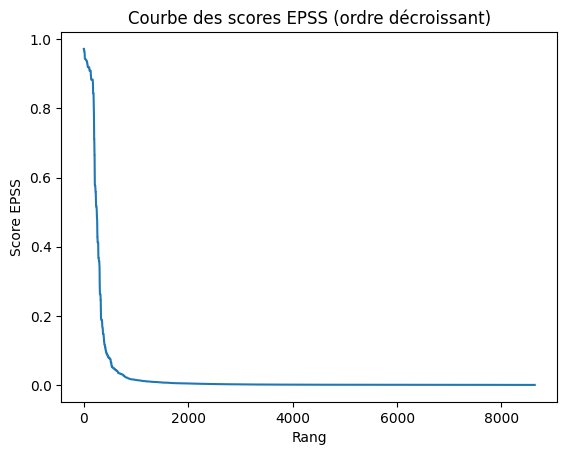

In [8]:
epss_sorted = df["EPSS"].dropna().sort_values(ascending=False).reset_index(drop=True)

plt.figure()
plt.plot(epss_sorted)
plt.title("Courbe des scores EPSS (ordre décroissant)")
plt.xlabel("Rang")
plt.ylabel("Score EPSS")
plt.show()



*   Courbe en “falaise” : très peu de vulnérabilités ont un EPSS élevé, puis une longue traîne proche de 0.
*   l’EPSS est un excellent filtre d’alerte immédiate (les tout premiers rangs).



Classement des produits les plus affectés : pour mettre en lumière
les systèmes les plus vulnérables et cibler les actions à entreprendre.

In [9]:
top_produits = (
    df.groupby("Produit").size().sort_values(ascending=False).head(10)
)
print(top_produits, "\n")

top_editeurs = (
    df.groupby("Éditeur").size().sort_values(ascending=False).head(10)
)
print(top_editeurs)

Produit
Non disponible                                                                                                    7513
Linux                                                                                                              943
Kernel                                                                                                             810
OpenSSL                                                                                                            301
Linux Kernel                                                                                                       270
kernel                                                                                                             218
https://github.com/curl/curl                                                                                       205
Java SE JDK and JRE                                                                                                201
Red Hat Enterprise Linux 9, Red Hat Ente

Le fait qu'un produit/éditeur soit présent dans ce classement ne veut pas dire qu'il est très deffaillant mais peut refléter le fait qu'il soit beacoup audité

Heatmap des corrélations entre CVSS et EPSS : Analyser la relation entre le score
CVSS (niveau de gravité) et le score EPSS (probabilité d'exploitation).

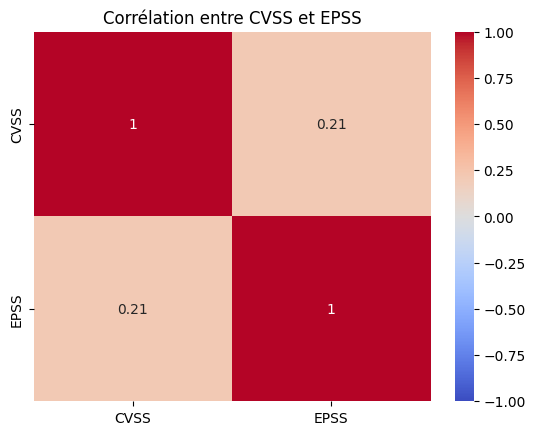

In [10]:
import seaborn as sns
df_cvss_epss = df[["CVSS", "EPSS"]].dropna()  # Supprimer les NaN

corr_matrix = df_cvss_epss.corr()  # Calculer la matrice de corrélation (Pearson)

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Corrélation entre CVSS et EPSS")
plt.show()



*   Corrélation modérée seulement : un CVSS haut n’implique pas forcément une exploitation probable, et inversement
*   CVSS seul ne suffit pas pour décider d’alerter



Nuage de points entre Score CVSS et Score EPSS : Visualiser comment la
probabilité d'exploitation (EPSS) évolue par rapport au niveau de gravité (CVSS)

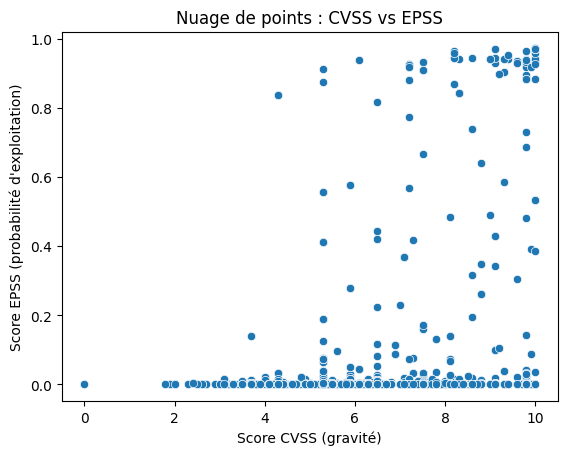

In [11]:
plt.figure()
sns.scatterplot(data=df_cvss_epss, x="CVSS", y="EPSS")
plt.title("Nuage de points : CVSS vs EPSS")
plt.xlabel("Score CVSS (gravité)")
plt.ylabel("Score EPSS (probabilité d'exploitation)")
plt.show()



*   La plupart des points sont à EPSS ~ 0
*   Quelques EPSS très haut ressortent : ce sont eux qui justifient une alerte prioritaire, car ils combinent gravité et probabilité d’exploitation



Courbe cumulative des vulnérabilités en fonction du temps : Montrer l’évolution
temporelle du nombre de vulnérabilités détectées.

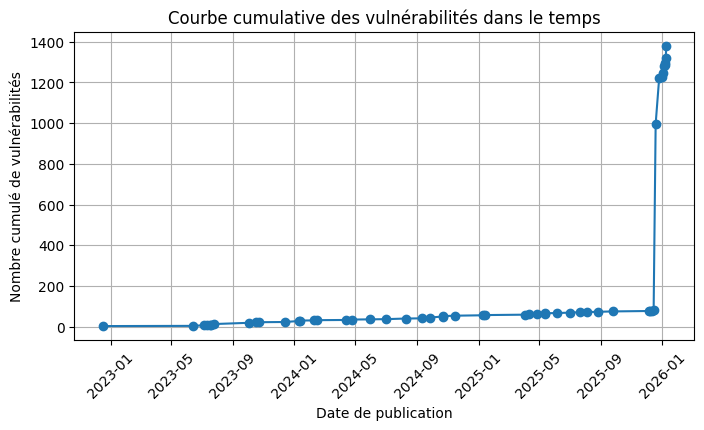

In [10]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce") # valeurs non convertibles deviennent NaT

df_time = df.dropna().sort_values("Date")

vulns_per_day = df.groupby("Date").size()

cumul_vulns = vulns_per_day.cumsum()

# Tracer la courbe
plt.figure(figsize=(8,4))
plt.plot(cumul_vulns.index, cumul_vulns.values, marker='o', linestyle='-')
plt.title("Courbe cumulative des vulnérabilités dans le temps")
plt.xlabel("Date de publication")
plt.ylabel("Nombre cumulé de vulnérabilités")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



*   Au fil du temps de nouvelles vulnérabilités sont découverte et s'ajoute à celle existantes




Boxplot des scores CVSS par éditeur pour montrer la dispersion des scores CVSS
pour les éditeurs les plus affectés.

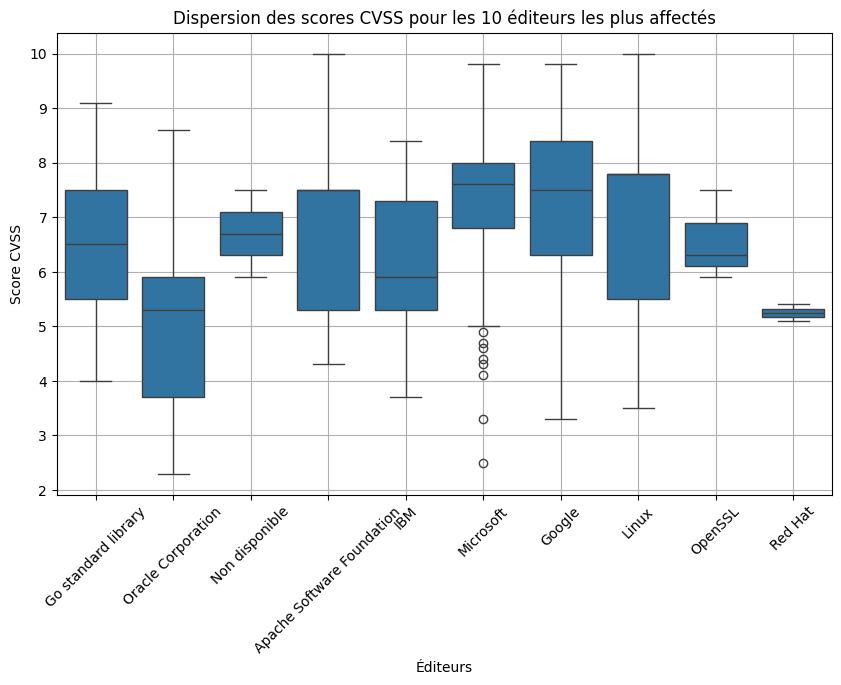

In [13]:
df_top = df[df["Éditeur"].isin(top_editeurs.index)]
df_editeurs_cvss=df_top[["Éditeur","CVSS"]].dropna()
plt.figure(figsize=(10,6))
sns.boxplot(x="Éditeur", y="CVSS", data=df_editeurs_cvss)
plt.xticks(rotation=45)  # pour que les noms des éditeurs ne se chevauchent pas
plt.title("Dispersion des scores CVSS pour les 10 éditeurs les plus affectés")
plt.ylabel("Score CVSS")
plt.xlabel("Éditeurs")
plt.grid()
plt.show()




*    Les éditeurs n’ont pas tous le même profil : certains ont une dispersion large (gravités très variées), d’autres sont plus homogènes.
*    Les éditeurs google, Linux et GO necessite une plus grande surveillance car il concentre des vulnérabilité potentiellement plus critiques



Visualiser les versions les plus fréquemment touchées des produits concernés.


In [14]:
df_top_produit = df[df["Produit"].isin(top_produits.index)]
df_produit_versions = df_top_produit[["Produit", "Versions_Affectées"]].dropna()

dico_versions = {}
for produit, versions in df_produit_versions.itertuples(index=False):
    for version in str(versions).split(","):
        if version == "" or version.lower() == "unspecified":
            continue
        dico_versions.setdefault(produit, []).append(version)

df_long = pd.DataFrame(
    [(p, v) for p, vs in dico_versions.items() for v in vs],
    columns=["Produit", "Version"]
)

df_counts = (df_long.groupby(["Produit", "Version"]).size().reset_index(name="Occurrences"))

top3_par_produit = (df_counts.sort_values(["Produit", "Occurrences"], ascending=[True, False]).groupby("Produit").head(3).reset_index(drop=True))

affichage = (top3_par_produit.groupby("Produit")["Version"].apply(lambda s: ", ".join(s.tolist())).reset_index(name="Top_3_versions"))

print(affichage.to_string(index=False))







                                                                                                       Produit                                                             Top_3_versions
                                                                                           Java SE JDK and JRE  Oracle Java SE:11.0.18,  Oracle Java SE:8u361,  Oracle Java SE:8u361-perf
                                                                                                        Kernel                                                          3.8, unknown, 5.9
                                                                                                         Linux          1da177e4c3f41524e886b7f1b8a0c1fc7321cac2,  2.6.12, Non disponible
                                                                                                  Linux Kernel                                                             0, 4.14, 3.0.0
                                                                      



*   Quelques produits ressortent avec des versions qui reviennent souvent
*   Permet de mieux cibler les clients qui sont exposé aux versions deffectueurse et donc personnaliser l'alerte

